### Computational Guided Inquiry for PChem (Neshyba, 2022)

## Visualizing $H(T,P)$

As we've seen, the enthalpy of a gas can be written 

$$
H(T,V) = [{5 \over 2}RT + f_{rot}(T) + f_{vib}(T) + f_{intermol}(T,P)] \times n \ \ \ (1)
$$ 

where ${5 \over 2}RT$ comes from the fact that there's ${3 \over 2}RT$ in kinetic energy, plus $RT$ as an approximation to the $PV$ in $H=U+PV$. We've also seen how to write the other terms in the brackets. For example, for a van der Waals gas, we found that because the slope of $H(T,P)$ in the pressure direction is $\mu_T \approx b - {{2a}\over{RT}}$, then $f_{intermol}(T,P)$ is given by

$$
f_{intermol}(T,P) \approx P(b - {{2a}\over{RT}}) \ \ \ (2)
$$

So much for the math ... what does $H(T,P)$ *look like*? That's what we'll be doing here: inspecting the enthalpy of a van der Waals gas as a thermodynamic surface, in a temperature/pressure state space. One thing you'll be able to see from this is that $H(T,P)$ has a kind of twist: at low temperatures, the slope in the pressure direction (which we know as $\mu_T$) is negative, but at a high enough temperature, that slope becomes positive. The temperature at which this twist switches, from $\mu_T<0$ to $\mu_T>0$, is called the *inversion temperature*. 

That slope is, actually, something we can measure in an experiment called the *Joule-Thomson* experiment. It's a very simple experiment: you open the nozzle on a tank of compressed gas, and measure how much the temperature of the escaping gas goes up or down!

Because of this connection to the Joule-Thomson experiment, you'll be introduced in this exercise to a new way to look at those surfaces: contour plots. What are contour plots? If you're hiking around a mountain and have brought along an elevation contour map, you'll be able to see where paths of constant altitude would take you. Contour plots of $H(T,P)$ show paths through a temperature/pressure state space, for which the enthalpy is constant. In the lingo of Thermodynamics, these paths are called *isenthalps*. It turns out that isenthalps are very useful in identifying things like the inversion temperature, and therefore they help us predict, in a Joule-Thomson experiment, whether the gas coming out of the nozzle will heat up or cool down. 

### Learning Goals
1. I can plot $H(T,P)$ for a given van der Waals gas, as a thermodynamic surface and as a contour map.
1. I can identify the inversion temperature from such plots.
1. I can describe what an *isenthalp* is.

In [1]:
# Import resources
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

### van der Waals parameters
Below, we define van der Waals parameters for CO2.

In [3]:
# Constants
R = AssignQuantity(8.314,'J/mol/K')
n = AssignQuantity(1,'mol')

# vdw parameters for CO2
a = AssignQuantity(5,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(.5,'L /mol'); print(b)

T = 2*a/(R*b)
T.ito('K')
print(T)

5 bar * liter ** 2 / mole ** 2
0.5 liter / mole
240.5580947798894 kelvin


### Hunting for the inversion temperature
In the cell below, we guess at a temperature range, get the enthalpy in that range, and display the results as a thermodynamic surface and as a contour plot -- in which the lines are lines of constant enthalpy, called *isenthalps*. The components of $H(T,P)$ are such that it can translate and rotate, but not vibrate. That's an approximation, but a room temperature not such a bad one. 

After you've executed the cell, you'll need to modify the center until you can clearly see the inversion temperature. Here's a hint: if the gas cools along an isenthalp going from high pressure to low pressure, it's colder than the inversion temperture.

<IPython.core.display.Javascript object>


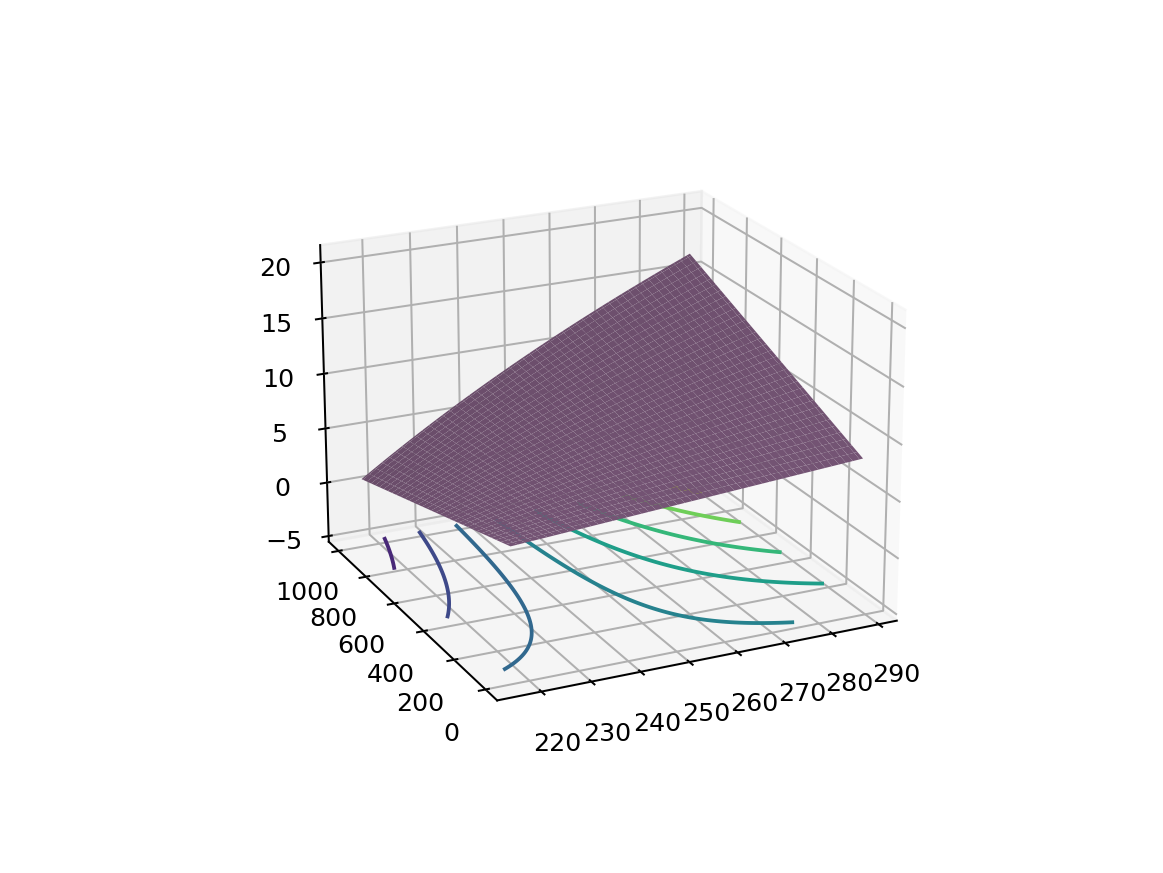

0.7444444444444426 kilojoule


(-5.0, 21.0)

In [10]:
# Choose a temperature to focus on
T_center = T.magnitude

# Figure out a range of temperatures around that to investigate
number_of_temperatures = 100
T_min = T_center*.9
T_max = T_center*1.2


# Also choose a range of pressures
P_min = 1
P_max = 1000
number_of_pressures = 101

# Now make the state space
Tgrid,Pgrid = PL.Statespace([T_min, T_max, number_of_temperatures],[P_min, P_max, number_of_pressures])
Tgrid = AssignQuantity(Tgrid,'K')
Pgrid = AssignQuantity(Pgrid,'bar')

# Calculate H(T,P) for the gas
f_intermolecular = Pgrid*(b-2*a/(R*Tgrid))
H = (5/2*R*Tgrid + 2/2*R*Tgrid +f_intermolecular)*n

# Convert H to kJ
H.ito('kJ')

# # Graphing as a thermodynamic surface
# ax = PL.plot_surface(Tgrid, Pgrid, H, color='plum') 
# ax.set_xlabel('T ('+str(Tgrid.units)+')')
# ax.set_ylabel('P ('+str(Pgrid.units)+')')
# ax.set_zlabel('H ('+str(H.units)+')')

# # Graph it as a contour plot
# plt.figure()
# plt.grid(True)
# plt.contour(Tgrid, Pgrid, H,linestyles='solid', linewidths=3)
# plt.xlabel('T ('+str(Tgrid.units)+')')
# plt.ylabel('P ('+str(Pgrid.units)+')')

# Both
ax = PL.plot_surface(Tgrid.magnitude, Pgrid.magnitude, H.magnitude, color='plum')
print(np.min(H))
bottom = -5
top = 21
ax.contour(Tgrid.magnitude, Pgrid.magnitude, H.magnitude,offset=bottom)
ax.set_zlim([bottom,top])


### Pause for analysis
In the cell below, say what it looks like the inversion temperature for $CO_2$ is.

### BEGIN SOLUTION
### END SOLUTION

### Comparing to an analytical result
It turns out that in the case of a van der Waals gas, you can pretty easily predict the temperature at which $\mu_T=0$. How? On paper, set $\mu_T\approx b - {{2a}\over{RT}}=0$, and solve for the temperature. That's the inversion temperature (according to van der Waals, anyway). In the cell below, evaluate this temperature (you'll have to convert to degrees kelvin).

In [ ]:
### BEGIN SOLUTION
T = 2*a/(R*b)
T.ito('K')
print(T)


# Calculating mu_T from experimental results
n = AssignQuantity(1,'mol')
R = AssignQuantity(8.314,'J/(mol K)')
Cp = 7/2*R*n
mu_JT = AssignQuantity(1,'K/bar'); print('mu_JT =', mu_JT)
mu_J = -Cp*mu_JT
mu_J.ito('L')
print('mu_T =', mu_J)
### END SOLUTION

### Pause for Analysis
Did the temperature you just got agree with what you concluded from the isenthalps?

### BEGIN SOLUTION
### END SOLUTION

### Refresh/save/validate/close/submit/logout